In [1]:
pip install tensorflow


In [2]:
import tensorflow as tf
print(tf.__version__)

2.17.1


In [3]:
from tensorflow.keras.preprocessing.text import one_hot

In [4]:
import pandas as pd
import numpy as np

In [5]:
df =pd.read_csv("/content/IMDB Dataset.csv")

In [6]:
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [7]:
df.shape

(50000, 2)

In [8]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [9]:
df['sentiment']=df['sentiment'].map({'positive':1,'negative':0})

In [10]:
#separating independent features
X= df.drop('sentiment',axis=1)

In [11]:
#getting dependant feature
y=df['sentiment']

In [12]:
X.shape

(50000, 1)

In [13]:
y.shape

(50000,)

In [14]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences #for pre/post padding
from tensorflow.keras.models import Sequential #for sequential neural network
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [15]:
#vocabulary size
voc_size=20000

## One-hot Representation

In [16]:
messages=X.copy()

In [17]:
messages['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [18]:
messages

review
0      One of the other reviewers has mentioned that ...
1      A wonderful little production. <br /><br />The...
2      I thought this was a wonderful way to spend ti...
3      Basically there's a family where a little boy ...
4      Petter Mattei's "Love in the Time of Money" is...
...                                                  ...
49995  I thought this movie did a down right good job...
49996  Bad plot, bad dialogue, bad acting, idiotic di...
49997  I am a Catholic taught in parochial elementary...
49998  I'm going to have to disagree with the previou...
49999  No one expects the Star Trek movies to be high...

[50000 rows x 1 columns]

In [19]:
import nltk
import re
from nltk.corpus import stopwords

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
# Data Preprocessing
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]
for i in range(0,len(messages)):
  #print(i)
  reviewed = re.sub('[^a-zA-Z]',' ',messages['review'][i])
  reviewed=reviewed.lower()
  reviewed=reviewed.split()

  reviewed=[ps.stem(word) for word in reviewed if not word in  stopwords.words('english')]
  reviewed= ' '.join(reviewed)
  corpus.append(reviewed)

In [22]:
corpus

['one review mention watch oz episod hook right exactli happen br br first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word br br call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away br br would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch d

In [23]:
corpus[1]

'wonder littl product br br film techniqu unassum old time bbc fashion give comfort sometim discomfort sens realism entir piec br br actor extrem well chosen michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrificli written perform piec master product one great master comedi life br br realism realli come home littl thing fantasi guard rather use tradit dream techniqu remain solid disappear play knowledg sens particularli scene concern orton halliwel set particularli flat halliwel mural decor everi surfac terribl well done'

In [24]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] #we specify words and voc_size
onehot_repr

[[14462,
  2693,
  12564,
  9529,
  18614,
  16898,
  6183,
  12176,
  10570,
  7798,
  13124,
  13124,
  14463,
  14309,
  1263,
  18614,
  3568,
  4371,
  14715,
  8461,
  12457,
  12176,
  15149,
  10508,
  9939,
  6496,
  12444,
  3832,
  13831,
  6496,
  11483,
  16927,
  19864,
  9406,
  15424,
  8461,
  7194,
  8180,
  8049,
  15149,
  13124,
  13124,
  8833,
  18614,
  2664,
  7788,
  19291,
  11799,
  11856,
  744,
  770,
  12839,
  1105,
  18622,
  5544,
  306,
  12426,
  14132,
  15730,
  15869,
  17360,
  11161,
  12484,
  2575,
  165,
  13280,
  931,
  5544,
  12770,
  14191,
  6929,
  83,
  10467,
  9885,
  4749,
  10875,
  1463,
  15390,
  10689,
  8804,
  1225,
  288,
  19619,
  12946,
  15083,
  16520,
  16849,
  13124,
  13124,
  11766,
  13221,
  4751,
  6095,
  6496,
  9633,
  3390,
  19432,
  6496,
  12033,
  15663,
  8728,
  6745,
  4380,
  7147,
  6550,
  15663,
  3483,
  15663,
  18415,
  18614,
  9879,
  9358,
  14463,
  16898,
  17610,
  16452,
  1263,
  5738,

In [25]:
onehot_repr[1]

[16439,
 11959,
 12554,
 13124,
 13124,
 7028,
 4377,
 15246,
 10339,
 17903,
 14109,
 13775,
 5053,
 3335,
 17663,
 2399,
 1306,
 148,
 12807,
 3630,
 13124,
 13124,
 2152,
 1948,
 2956,
 1491,
 14985,
 924,
 1069,
 10009,
 18209,
 316,
 11233,
 6635,
 6848,
 2494,
 11249,
 12622,
 3018,
 2615,
 5852,
 2956,
 12560,
 9529,
 4489,
 14128,
 15638,
 3630,
 19555,
 12554,
 14462,
 5597,
 19555,
 9155,
 18413,
 13124,
 13124,
 148,
 11050,
 4077,
 12770,
 11959,
 14309,
 11096,
 12322,
 17782,
 8049,
 10863,
 11373,
 4377,
 12622,
 10632,
 17201,
 798,
 8074,
 1306,
 5556,
 14715,
 11541,
 7094,
 6419,
 12457,
 5556,
 6243,
 6419,
 13305,
 8247,
 13122,
 16903,
 17592,
 2956,
 10504]

## Applying Embedding Layer

In [26]:
#embedding is done to ensure no OOV
sent_length=5000
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[    0     0     0 ...  6257 19941  5149]
 [    0     0     0 ... 17592  2956 10504]
 [    0     0     0 ... 10508  6635 10331]
 ...
 [    0     0     0 ...  7431  8491  4749]
 [    0     0     0 ... 13097  4924 18868]
 [    0     0     0 ...  1860   562 15587]]


In [27]:
#Creating model
embedding_vector_features=40 #hyper-parameter, can be anything
#model=Sequential()

model = Sequential([
    Embedding(input_dim=voc_size, output_dim=200, input_shape=(sent_length,)) #the Embedding layer works same as word-2-vec and trainsall neural network
])
model.add(LSTM(300))
model.add(Dense(1,activation='sigmoid'))#since it is binary classification hence Dense layer is 1
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
len(embedded_docs),y.shape

(50000, (50000,))

In [29]:
X_final = np.array(embedded_docs)#converting the list of embedded-docs to array
y_final = np.array(y)

In [30]:
X_final.shape,y_final.shape

((50000, 5000), (50000,))

In [31]:
y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

## Train test Split

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_final,y_final, test_size=0.33,random_state=42)

In [33]:
print(type(y_train[0]))
print(type(y_test[0]))

<class 'numpy.int64'>
<class 'numpy.int64'>


## Model Training

In [34]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=10)
history

Epoch 1/8
3350/3350 ━━━━━━━━━━━━━━━━━━━━ 872s 259ms/step - accuracy: 0.7450 - loss: 0.5211 - val_accuracy: 0.7177 - val_loss: 0.5800
Epoch 2/8
3350/3350 ━━━━━━━━━━━━━━━━━━━━ 935s 264ms/step - accuracy: 0.8474 - loss: 0.3513 - val_accuracy: 0.8776 - val_loss: 0.2899
Epoch 3/8
3350/3350 ━━━━━━━━━━━━━━━━━━━━ 924s 264ms/step - accuracy: 0.9222 - loss: 0.2035 - val_accuracy: 0.8816 - val_loss: 0.2947
Epoch 4/8
3350/3350 ━━━━━━━━━━━━━━━━━━━━ 971s 279ms/step - accuracy: 0.9562 - loss: 0.1254 - val_accuracy: 0.8742 - val_loss: 0.3454
Epoch 5/8
3350/3350 ━━━━━━━━━━━━━━━━━━━━ 981s 278ms/step - accuracy: 0.9763 - loss: 0.0765 - val_accuracy: 0.8724 - val_loss: 0.4024
Epoch 6/8
3350/3350 ━━━━━━━━━━━━━━━━━━━━ 982s 278ms/step - accuracy: 0.9880 - loss: 0.0418 - val_accuracy: 0.8672 - val_loss: 0.4731
Epoch 7/8
3350/3350 ━━━━━━━━━━━━━━━━━━━━ 938s 265ms/step - accuracy: 0.9919 - loss: 0.0276 - val_accuracy: 0.8675 - val_loss: 0.5880
Epoch 8/8
3350/3350 ━━━━━━━━━━━━━━━━━━━━ 966s 278ms/step - accuracy: 

## Performance Metrics & Accuracy

In [35]:
y_pred=model.predict(X_test)

516/516 ━━━━━━━━━━━━━━━━━━━━ 61s 117ms/step


In [36]:
y_pred=np.where(y_pred >0.5,1,0) #can use AUC ROC Curce

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
confusion_matrix(y_test,y_pred)

array([[6921, 1287],
       [ 940, 7352]])

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.865030303030303

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      8208
           1       0.85      0.89      0.87      8292

    accuracy                           0.87     16500
   macro avg       0.87      0.86      0.86     16500
weighted avg       0.87      0.87      0.86     16500



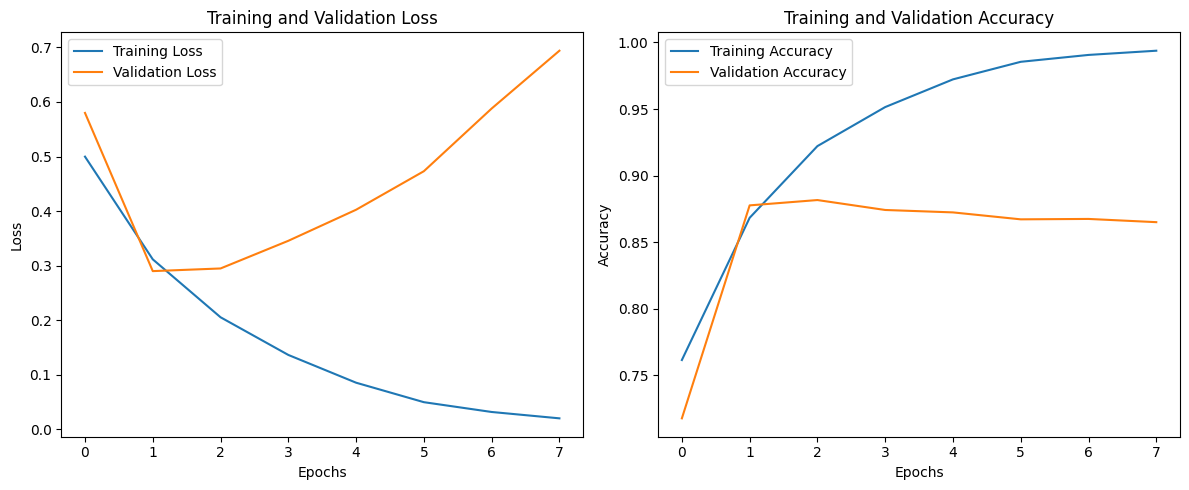

In [41]:
import matplotlib.pyplot as plt


# Plot Training and Validation Loss
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
